In [1]:
import pandas as pd 
import numpy as np 
import matplotlib as plt
from matplotlib import pyplot
import seaborn as sns
import matplotlib.pyplot as plt
import dabl

%matplotlib inline


C:\Users\patricio.fernandez\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Cargamos los datos. Vienen por separado 
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')
red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

In [3]:
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [4]:
# Los unimos y creamos la variable objetivo (binaria). En este caso 'type'
red['type'] = 1 # Rojo es 1
white['type'] = 0 # Blanco es 0

# los concatenamos ignorando el índice
wines_df = red.append(white, ignore_index=True)

In [5]:
# cabecera
wines_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


# EDA 

Todos los datos son numéricos. Exploremos con más detalle las variables para encontrar correlaciones e información relevante. La variable Quality parece ser la única NO continua, ya que tiene un caracter ordinal en un rango de clasificaicón. 

C:\Users\patricio.fernandez\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\patricio.fernandez\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\patricio.fernandez\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\patricio.fernandez\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


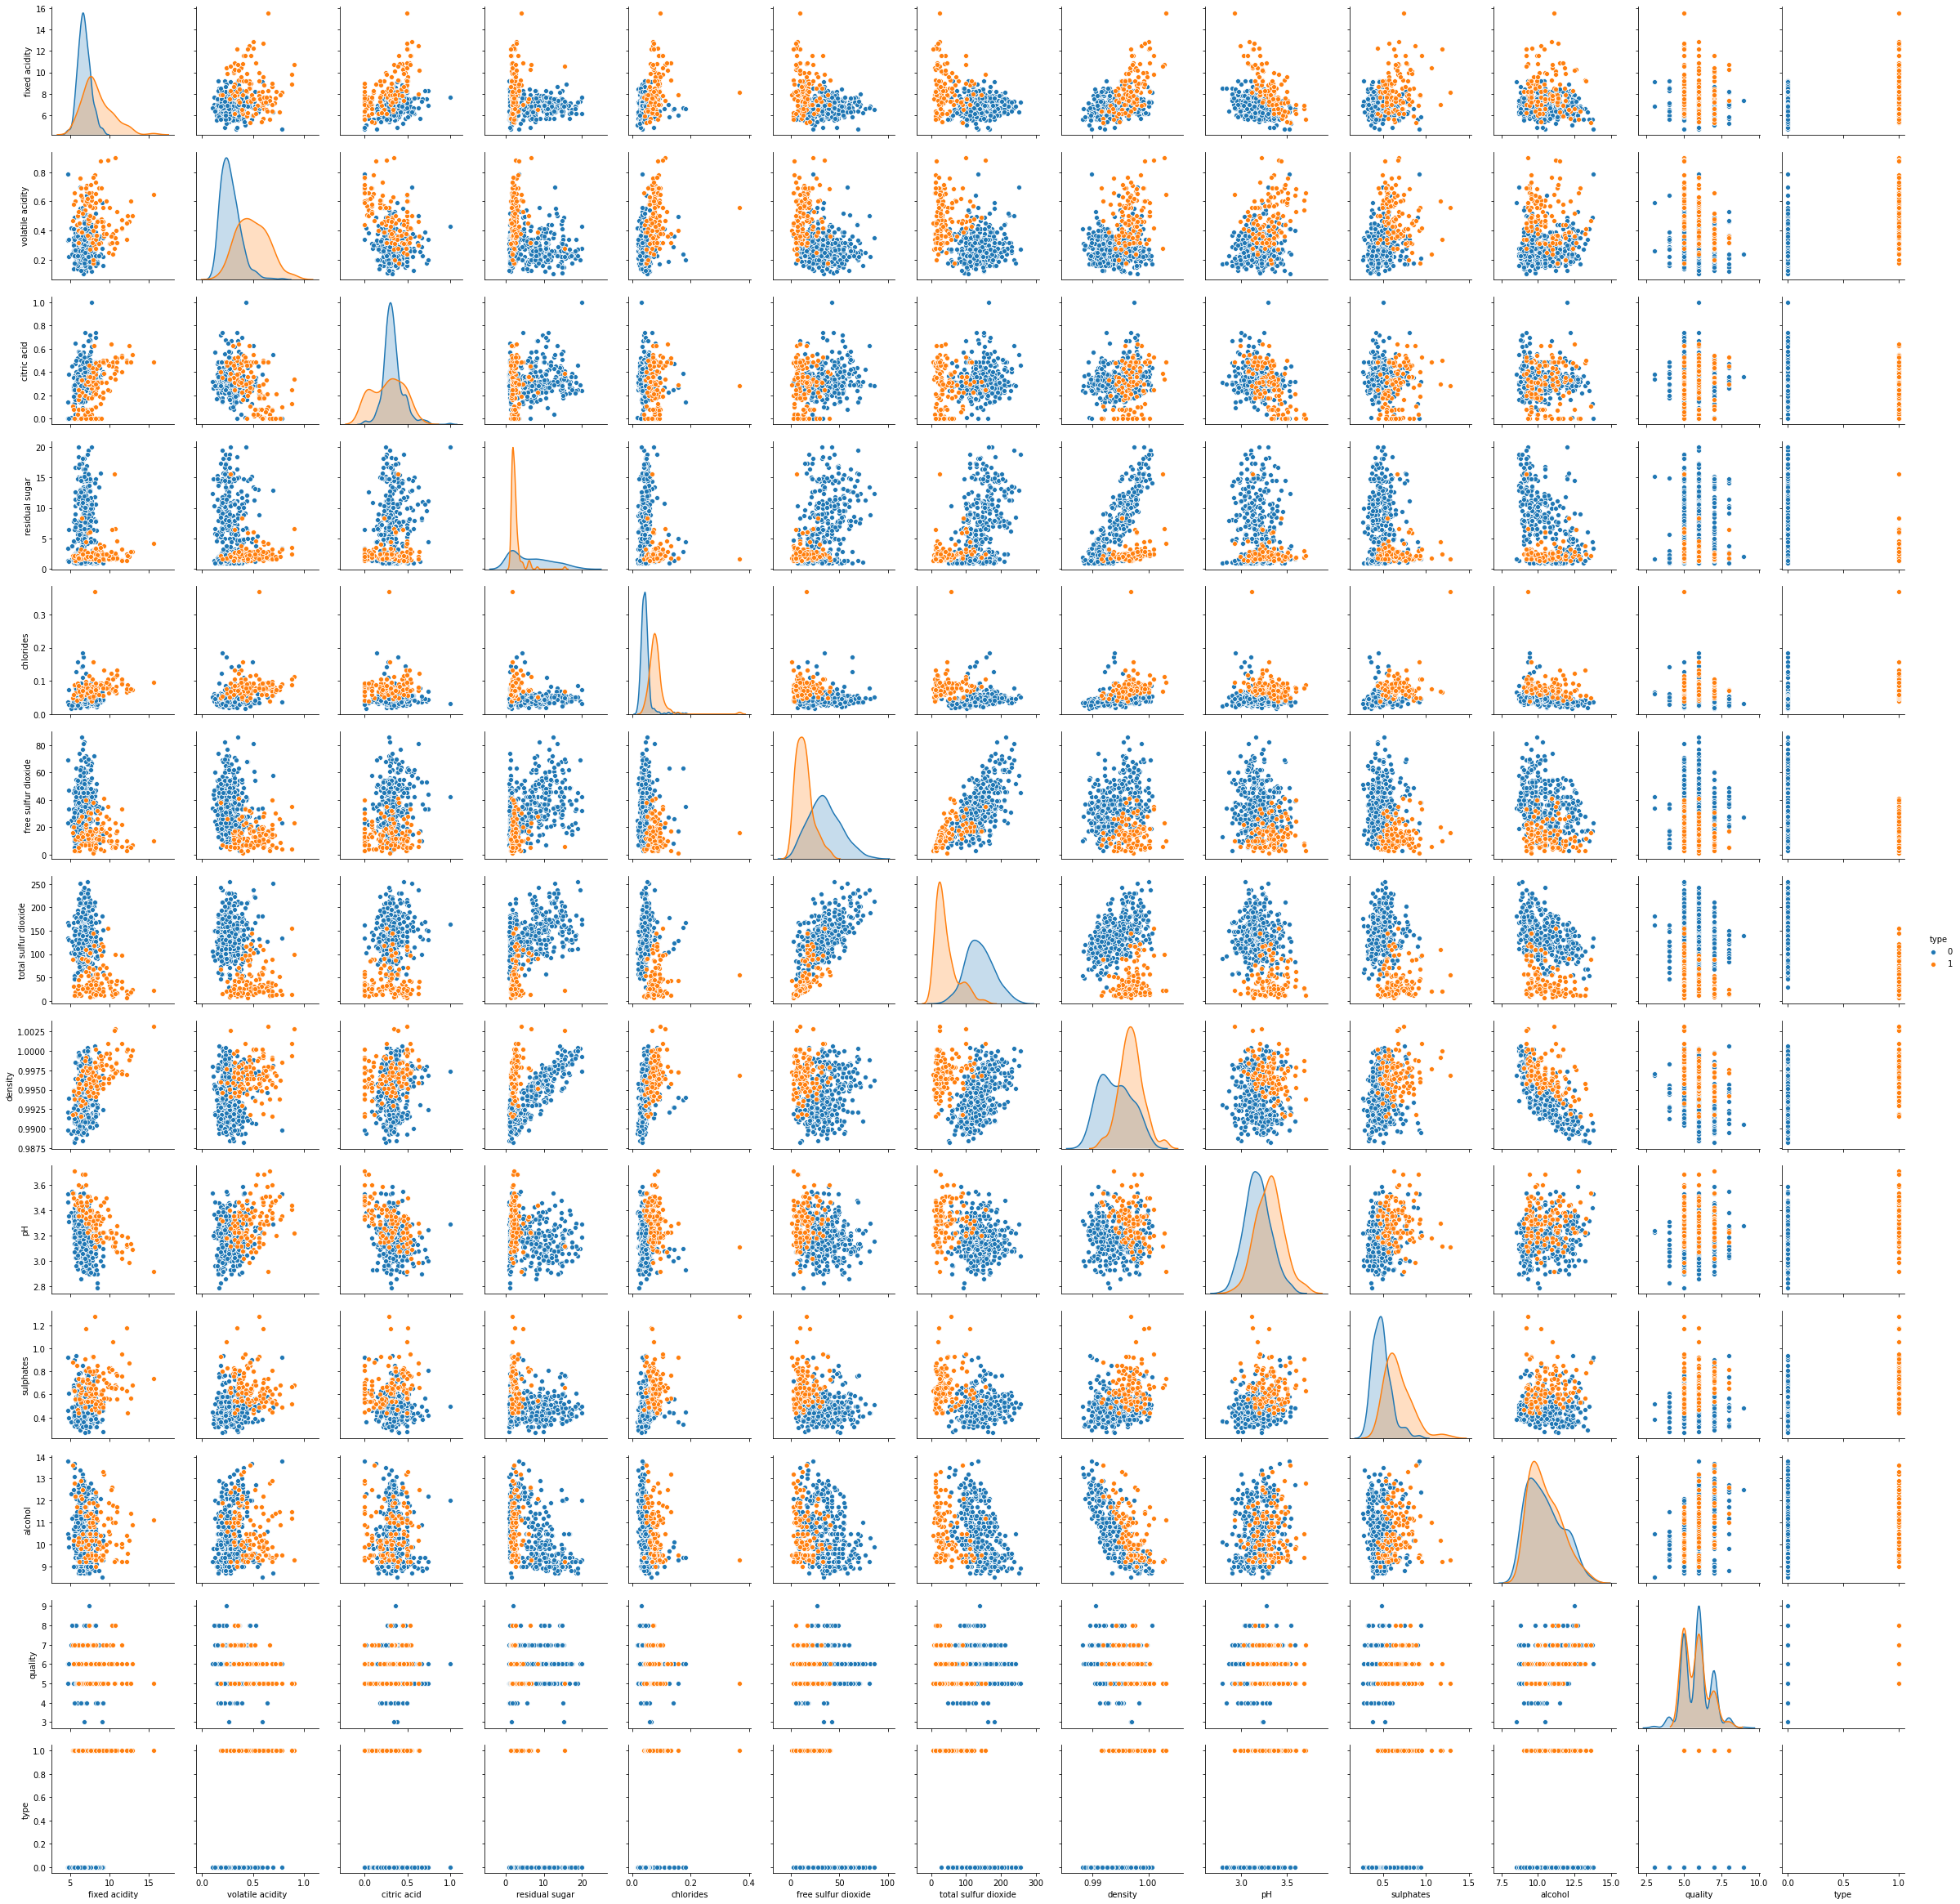

In [11]:
# Exploración de la relación entre variables
sns.pairplot(wines_df.sample(500), hue="type"); # ploteamos sobre una muestra para no cargar demasiado la memoria

# DABL

Hemos visto que DABL hace gran parte del análisis exploratorio para nosotros. Aprovechamos sus capacidades

Target looks like classification


C:\Users\patricio.fernandez\AppData\Local\Continuum\anaconda3\lib\site-packages\dabl\plot\utils.py:621: UserWarning: Dropped 2 outliers in column total sulfur dioxide.
  int(dropped), series.name), UserWarning)
C:\Users\patricio.fernandez\AppData\Local\Continuum\anaconda3\lib\site-packages\dabl\plot\utils.py:621: UserWarning: Dropped 3 outliers in column volatile acidity.
  int(dropped), series.name), UserWarning)
C:\Users\patricio.fernandez\AppData\Local\Continuum\anaconda3\lib\site-packages\dabl\plot\utils.py:621: UserWarning: Dropped 27 outliers in column chlorides.
  int(dropped), series.name), UserWarning)
C:\Users\patricio.fernandez\AppData\Local\Continuum\anaconda3\lib\site-packages\dabl\plot\utils.py:621: UserWarning: Dropped 8 outliers in column sulphates.
  int(dropped), series.name), UserWarning)
C:\Users\patricio.fernandez\AppData\Local\Continuum\anaconda3\lib\site-packages\dabl\plot\utils.py:621: UserWarning: Dropped 5 outliers in column fixed acidity.
  int(dropped), seri

Linear Discriminant Analysis training set score: 0.992


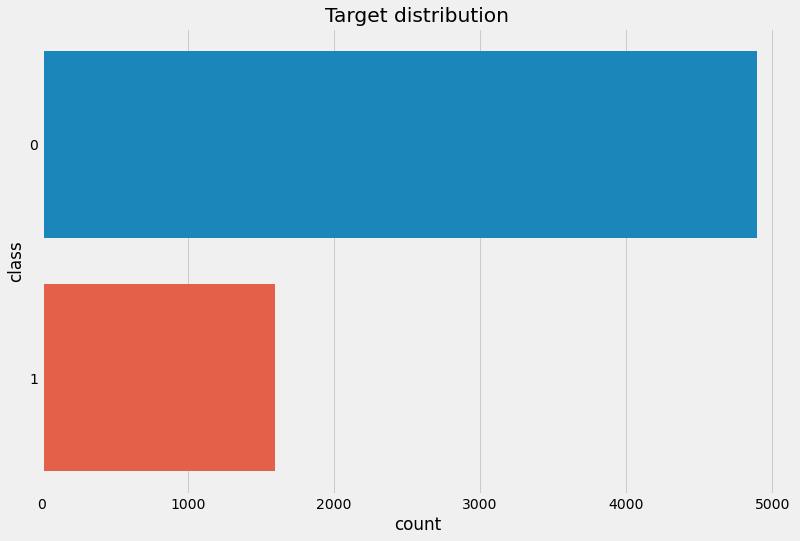

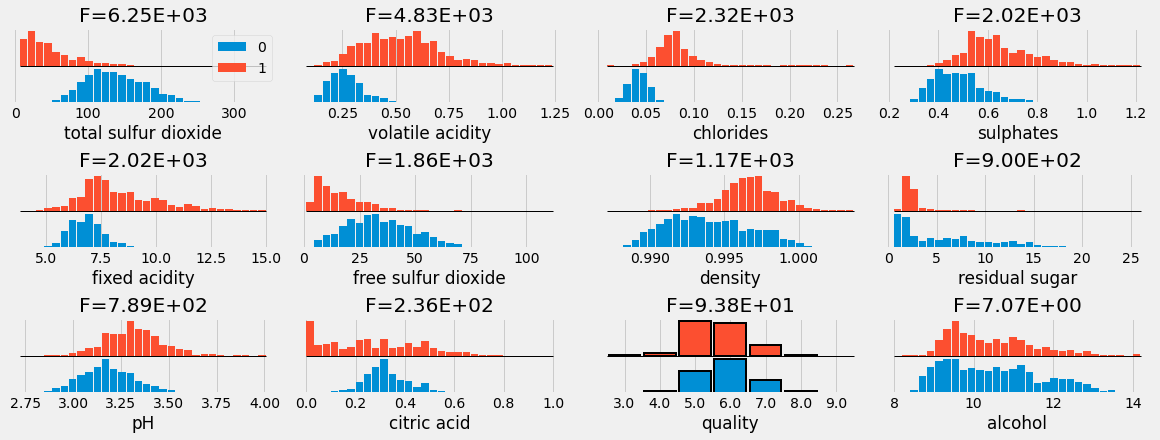

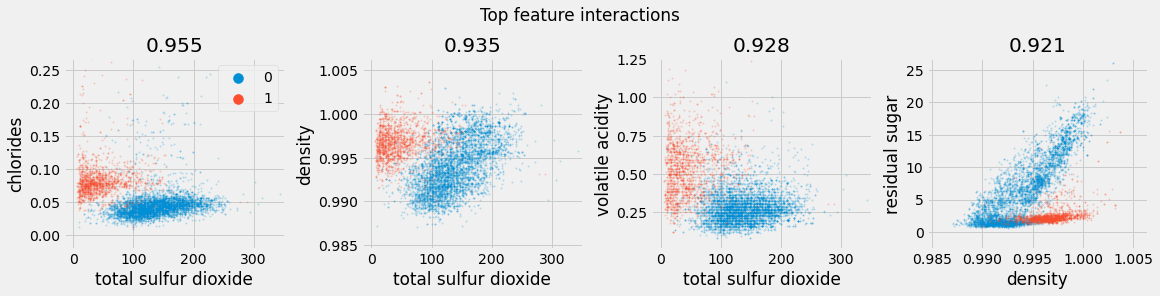

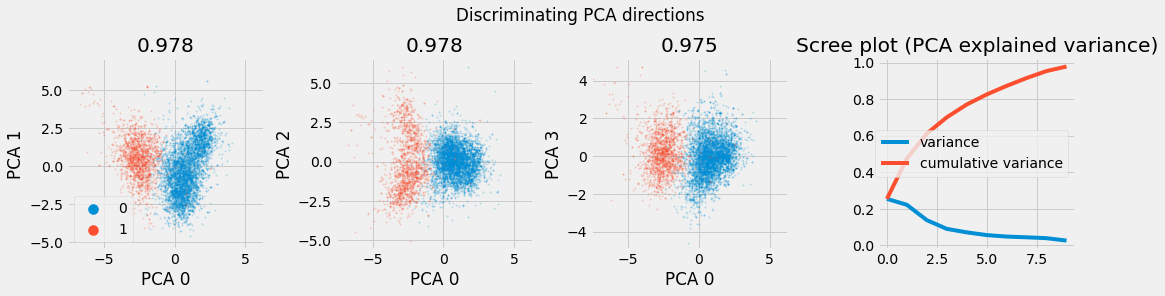

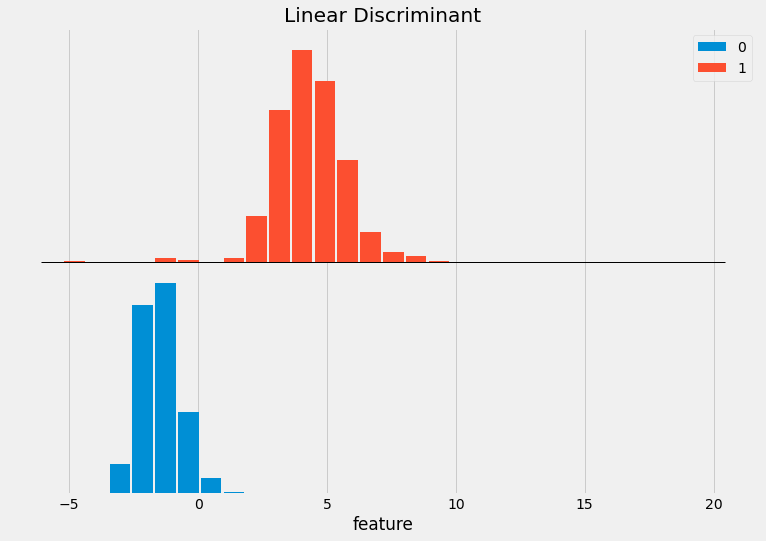

In [16]:
# Dejamos que DABL lo haga por nosotros 
plt.rcParams['figure.figsize'] = (12, 8)
plt.style.use('fivethirtyeight')
dabl.plot(wines_df, target_col = 'type')
plt.show();

Los datos muestran diferencias importantes entre los tipos de vino, siendo estos fácilmente calificables utilizando algoritmos lineales. Hay un importante potencial predictivo

# Construimos el set de entrenamiento y prueba


In [6]:
from sklearn.model_selection import train_test_split

TARGET = 'type'
# Variables predictoras
X= wines_df.loc[:, wines_df.columns != TARGET]

# Variable objetivo
y= wines_df[TARGET].values # 

# Realizamos el Split utilizando la función de sklearn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,stratify=y)

# Construímos el Modelo

In [7]:
from sklearn.preprocessing import MinMaxScaler # Normalizamos los datos utilizando el MINMAXScaler de sklearn 
from sklearn.linear_model import LogisticRegression # Importamos el modelo de Regresión Logística 
from sklearn.pipeline import Pipeline # Nos ayudará a automatizar todo
from sklearn.model_selection import GridSearchCV # Nos ayudará a realizar cross-validation
from sklearn.ensemble import RandomForestClassifier # Modelo de Random Forest
from sklearn.metrics import classification_report, accuracy_score # Métricas de precisión y performance


In [8]:
"""
Construimos una pipeline que primero Escalará los datos utilizando el MinMax Scaler
Luego pasará los datos por un modelo de regresión logística. Ese pipeline podrá ser 
llamado cada vez para realizar predicciones (inferencias) y así mantener siempre el mismo 
Scaler y cualquier procesamiento previo que se quiera realizar a los datos
"""
# Pipeline
lg_clf = Pipeline([
  ('scale', MinMaxScaler()),
  ('log_clf', LogisticRegression())]
  )

In [9]:
scoring = "accuracy" # métrica a optimizar
cv = 4 # Número de rondas de cross validation

# Parámetros para probar diferentes hiperparametros del modelo 
param_grid = [
  {'log_clf__C': [1, 10, 100, 1000,10000]}
 ]

# Realizamos el modelo con cross-validation y buscamos los parámetros óptimos
grid = GridSearchCV(lg_clf, cv=cv, param_grid=param_grid, scoring=scoring, n_jobs = -1)
grid.fit(X_train, y_train) # Entrenamos  

# summarize results
print(f"Resultados para {scoring}")
print("Mejor: %f utilizando %s" % (grid.best_score_, 
    grid.best_params_))
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Media de Score: {mean}, Des.Std: {stdev}  Con parametros: {param}")

Resultados para accuracy
Mejor: 0.992877 utilizando {'log_clf__C': 10000}
Media de Score: 0.9862132352941176, Des.Std: 0.003435198207696391  Con parametros: {'log_clf__C': 1}
Media de Score: 0.9887408088235294, Des.Std: 0.001635281469244992  Con parametros: {'log_clf__C': 10}
Media de Score: 0.9914981617647058, Des.Std: 0.0015016147842039649  Con parametros: {'log_clf__C': 100}
Media de Score: 0.9924172794117647, Des.Std: 0.0011924369004093348  Con parametros: {'log_clf__C': 1000}
Media de Score: 0.9928768382352942, Des.Std: 0.001763933178929322  Con parametros: {'log_clf__C': 10000}


C:\Users\patricio.fernandez\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [10]:
# Hacemos la predicción para el Set de prueba 
m_best = grid.best_estimator_ # Utilizamos el mejor estimador
y_pred = m_best.predict(X_test)

print (pd.crosstab(y_test,y_pred,
                   rownames = ['Actual'],
                   colnames = ['Preddición']))

print(f'Accuracy: {round(accuracy_score(y_pred, y_test),3)}')
print("-----------------------")
print("Reporte Detallado: ")

print(classification_report(y_test, y_pred,))

Preddición     0    1
Actual               
0           1613    4
1              8  520
Accuracy: 0.994
-----------------------
Reporte Detallado: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1617
           1       0.99      0.98      0.99       528

    accuracy                           0.99      2145
   macro avg       0.99      0.99      0.99      2145
weighted avg       0.99      0.99      0.99      2145



# Sacamos los Coeficientes de nuestro Modelo

In [55]:
log = m_best.steps[1][1] # Sacamos el modelo del pipeline
coef =log.coef_ # lista de coeficientes 
# Lo pasamos a un DataFrame para que sea presentable
coeffi_df = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(coef))],
                   axis = 1)
# Cambiamos los nombres de las columnas para mejorar la presentación
coeffi_df.columns = ["Variable","Coeficientes"] 
coeffi_df.sort_values('Coeficientes') # ordenamos 

,Variable,Coeficientes
3,residual sugar,-75.756568
6,total sulfur dioxide,-23.655939
0,fixed acidity,-3.409329
2,citric acid,-3.399880
8,pH,-1.858602
11,quality,1.381164
9,sulphates,5.751552
1,volatile acidity,10.690534
10,alcohol,11.595878
4,chlorides,12.792362
